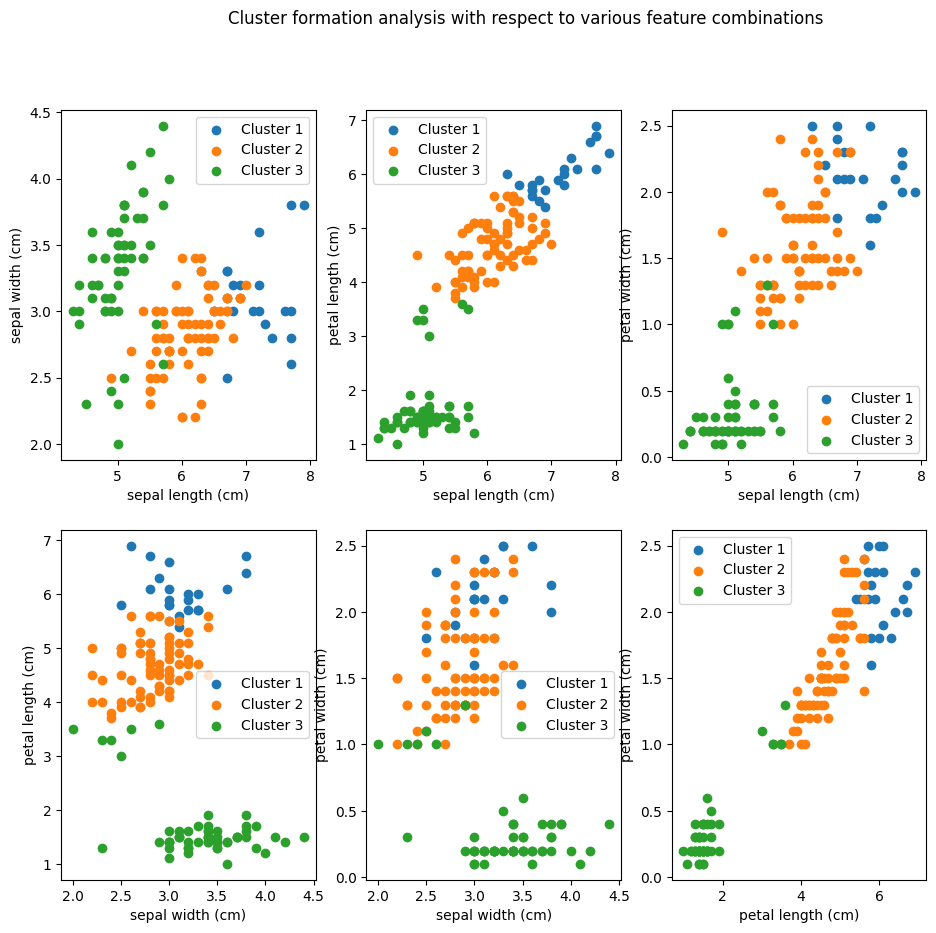

In [3]:
# Experiment 1: k-means clustering on iris dataset and cluster visualisation

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from itertools import combinations
import matplotlib

iris = load_iris()

# define the number of clusters to be made
k = 3

# taking the iris dataset as a numpy array
points_arr = np.array(iris.data)

# creating k random centroids, each having shape as (k, len(iris.feature_names))
# out of np.rand, np.randn, np.randint (on [min, max) of iris data array), drawing out random samples from uniform distribution
# and scaling them to [min, max) of iris data array produces the best results for the clusters
centroids = (np.max(points_arr) - np.min(points_arr)) * np.random.random_sample((k, len(iris.feature_names))) + np.min(points_arr)

# implement k-means clustering algorithm
def kmeans(points_arr, centroids):
  new_centroids = np.zeros(centroids.shape)
  clusters = []
  while(1):
    dist = np.zeros((points_arr.shape[0],k))
    for i in range(k):
      dist[:,i] = np.sqrt(np.sum((points_arr - centroids[i])**2,axis = -1))
    min_idx = np.argmin(dist, axis = -1)
    clusters = list(min_idx)
    for cluster in clusters:
      new_centroids[cluster] = np.mean(points_arr[min_idx == cluster], axis = 0)
    if np.all(new_centroids == centroids):
      break
    centroids = new_centroids
  return clusters, centroids

# get the clusters using k means algorithm
labels, centroids = kmeans(points_arr, centroids)

# get the feature names, with different pair combinations
feature_names, feature_idx = combinations(list(iris.feature_names), r = 2), combinations(list(range(points_arr.shape[1])), r = 2)
feature_combinations, feature_idx_combinations = [], []
for i in feature_names:
  feature_combinations.append(i)
for j in feature_idx:
  feature_idx_combinations.append(j)

len_combinations = len(feature_idx_combinations)

fig, ax = plt.subplots(2,len_combinations//2, figsize = (10, 10)) # for 6 pair combinations
plt.subplots_adjust(left = 0.035)

fig.suptitle("Cluster formation analysis with respect to various feature combinations")
f1, f2 = feature_combinations[0:len_combinations//2], feature_combinations[len_combinations//2:]
f3, f4 = feature_idx_combinations[0:len_combinations//2], feature_idx_combinations[len_combinations//2:]

color = np.random.randint(0,256,k)

for i in range(len(f1)):
  # plot scatter plot as per the centroid index as marker colour
  for label in set(labels):
    # iterate through unique label and create plot
    ax[0][i].scatter(points_arr[:, f3[i][0]][np.array(labels)==label],points_arr[:, f3[i][1]][np.array(labels)==label], label = "Cluster " + str(label+1))
  ax[0][i].set_xlabel(f1[i][0])
  ax[0][i].set_ylabel(f1[i][1])
  ax[0][i].legend()

for i in range(len(f2)):
  # plot scatter plot as per the centroid index as marker colour
  for label in set(labels):
    # iterate through unique label and create plot
    ax[1][i].scatter(points_arr[:, f4[i][0]][np.array(labels)==label],points_arr[:, f4[i][1]][np.array(labels)==label], label = "Cluster " + str(label+1))
  ax[1][i].set_xlabel(f2[i][0])
  ax[1][i].set_ylabel(f2[i][1])
  ax[1][i].legend()

{1: '12', 2: '120', 3: ['120', '34'], 4: '12034'}
Time taken to execute:- 0.13970136642456055 seconds


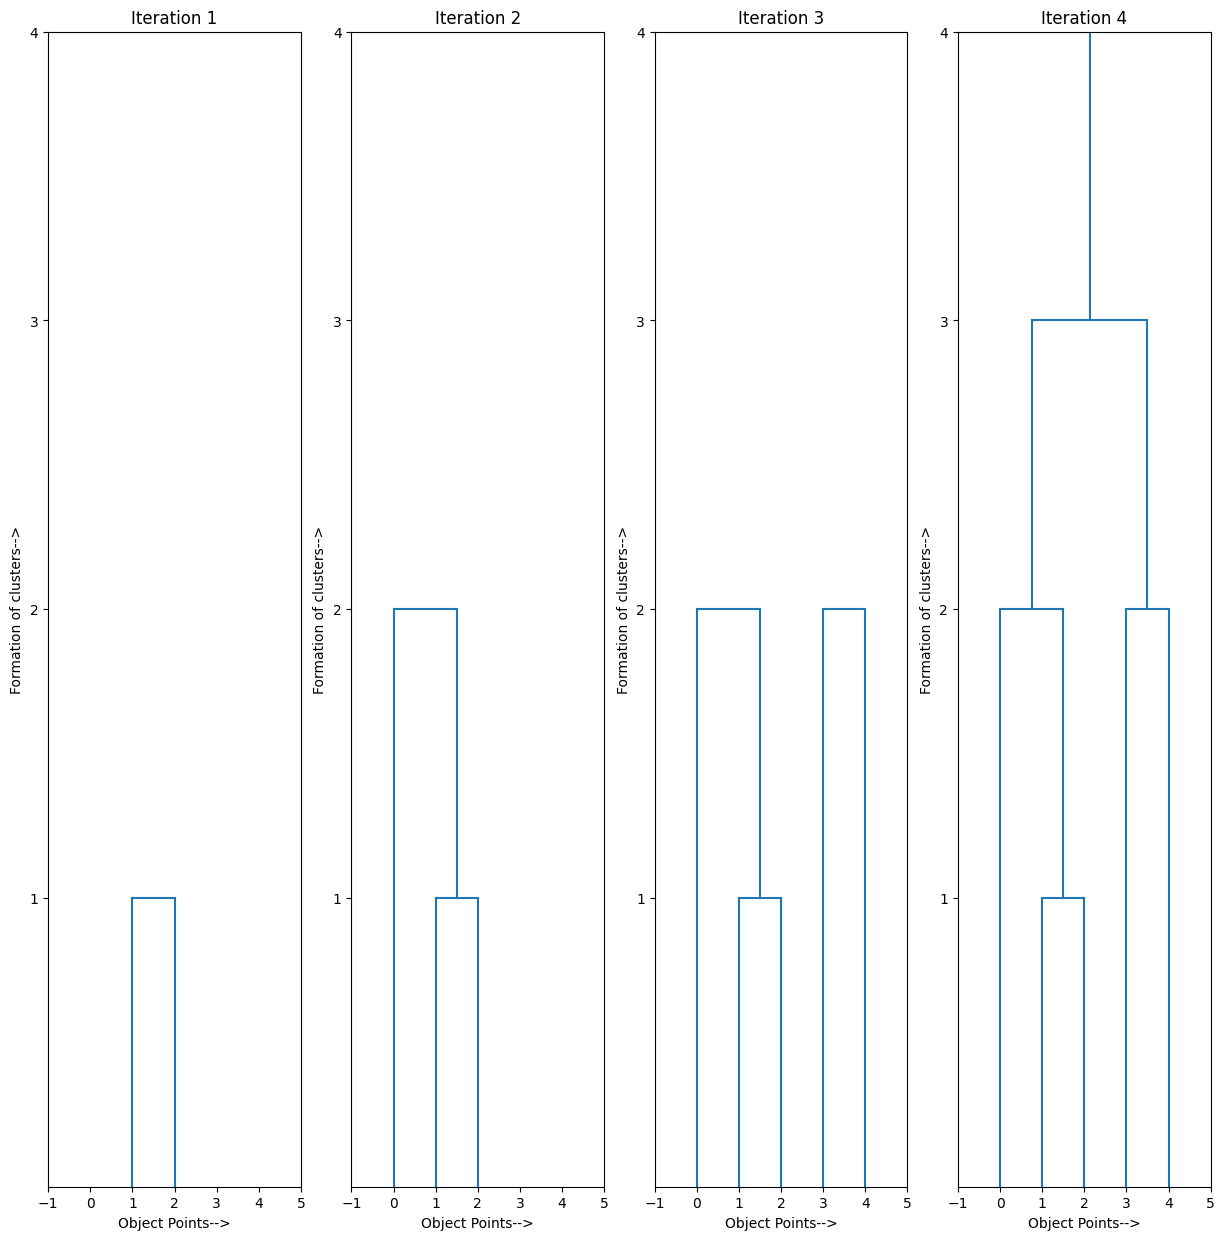

In [4]:
'''
Experiment 2: Implementation of Hierarchical clustering algorithm on a points dataset
'''

from itertools import combinations
import time
from math import sqrt

start_time = time.time()

points_df = pd.DataFrame(columns=['Objects','X','Y'])
points_df.loc[0,:] = [0,1,4]
points_df.loc[1,:] = [1,2,8]
points_df.loc[2,:] = [2,5,10]
points_df.loc[3,:] = [3,12,18]
points_df.loc[4,:] = [4,14,28]
min_dist = np.inf
best_idx = [-1, -1]  # randomly initialise indices for the points closest
cluster = {}
it = 1

distances_points = np.zeros((points_df.shape[0],points_df.shape[0]))

for i in range(points_df.shape[0]):
  distances_points[i][i] = np.inf # distance between same points not defined

for i in range(points_df.shape[0]):
  for j in range(i,points_df.shape[0]):
    if j==i:
      continue
    distances_points[i][j] = sqrt((points_df.loc[i,'X']-points_df.loc[j,'X'])**2 + (points_df.loc[i,'Y']-points_df.loc[j,'Y'])**2)
    if distances_points[i][j] < min_dist:
      best_idx[0] = str(i)
      best_idx[1] = str(j)
      min_dist = distances_points[i][j]

distances_points = distances_points + distances_points.T  # saving matrix calculations by taking only half of array computations

cluster[it] = best_idx[0]+best_idx[1]
rem_points = [str(i) for i in np.setdiff1d(np.array(points_df.loc[:,'Objects']), np.array([int(i) for i in set(cluster[it])]))]
min_dist = np.inf

while len(cluster[it])!=points_df.shape[0]:
  if isinstance(cluster[it], list):
    distances_track = pd.DataFrame(columns = cluster[it], index = cluster[it])
  else:
    distances_track = pd.DataFrame(columns = [cluster[it]]+rem_points, index = [cluster[it]]+rem_points)
  for i in distances_track.columns:
    distances_track.loc[i,i] = np.inf # distance between same points not defined

  for i in distances_track.index:
    for j in distances_track.columns:
      if j==i:
        continue
      # another if-else
      if len(i)>1 or len(j)>1:
        # presence of an already existing cluster
        point_comb = list(combinations([i[p] for p in range(len(i))]+[j[p] for p in range(len(j))],2))
        i_list = [i[p] for p in range(len(i))]
        j_list = [j[p] for p in range(len(j))]
        dist_arr = []
        # implementing single link hierarchical distance metric
        for comb in point_comb:
          if len(np.intersect1d(comb,i_list))==2 or len(np.intersect1d(comb,j_list))==2:
            continue
          comb = list(map(int, comb))
          dist_arr.append(distances_points[comb[0]][comb[1]])
        distances_track.loc[i,j] = min(dist_arr)
      else:
        distances_track.loc[i,j] = distances_points[int(i)][int(j)]
      if distances_track.loc[i,j] < min_dist:
        best_idx[0] = i
        best_idx[1] = j
        min_dist = distances_track.loc[i,j]

  # Implements further logic and completes cluster dictionary as formed
  it += 1
  prev_cluster_points = [cluster[it-1][p] for p in range(len(cluster[it-1]))]
  current_cluster_points = [best_idx[0][i] for i in range(len(best_idx[0]))] + [best_idx[1][i] for i in range(len(best_idx[1]))]
  if len(current_cluster_points)==points_df.shape[0]:
    break
  if len(np.intersect1d(prev_cluster_points, current_cluster_points))!=0:
    # points agglomerate to previously made cluster
    cluster[it] = best_idx[0]+best_idx[1]
    rem_points = [str(i) for i in np.setdiff1d(np.array(points_df.loc[:,'Objects']), np.array([int(i) for i in set(cluster[it])]))]
  else:
    # different cluster has been made
    cluster[it] = []
    cluster[it].append(cluster[it-1])
    cluster[it].append(best_idx[0]+best_idx[1])
  min_dist = np.inf

cluster[it] = ''.join(current_cluster_points)
print(cluster)  # prints the sequence of how clusters are agglomerated across iterations

# plots the dendogram
fig, ax = plt.subplots(1, len(cluster), figsize=(15,15))
for i in ax:
  i.set_xticks(sorted(list(points_df.loc[:,'Objects']) + [-1, points_df.shape[0]]))
  i.set_yticks(np.arange(1,5))
  i.set_xlabel("Object Points-->")
  i.set_ylabel("Formation of clusters-->")

cluster_remake = {}
for i in range(len(cluster)):
  ax[i].set_title("Iteration " + str(i+1))
  if isinstance(cluster[i+1], list):
    cluster_points = [int(cluster[i+1][1][j]) for j in range(len(cluster[i+1][1]))]
  else:
    cluster_points = [int(cluster[i+1][j]) for j in range(len(cluster[i+1]))]
  cluster_remake[i+1] = cluster_points

for i in range(1,len(cluster_remake)+1):
  for j in cluster_remake[1]:
      ax[i-1].axvline(x = j, ymin = 0, ymax = 0.25)
  ax[i-1].axhline(y=1, xmin = (cluster_remake[1][0]+1)/6, xmax = (cluster_remake[1][1]+1)/6)

for j in cluster_remake[3]:
  ax[2].axvline(x = j, ymin = 0, ymax = 0.5)
  ax[3].axvline(x = j, ymin = 0, ymax = 0.5)
ax[2].axhline(y=2, xmin = (cluster_remake[3][0]+1)/6, xmax = (cluster_remake[3][1]+1)/6)
ax[3].axhline(y=2, xmin = (cluster_remake[3][0]+1)/6, xmax = (cluster_remake[3][1]+1)/6)

for i in range(1,4):
  ax[i].axvline(x = 0, ymin = 0, ymax = 0.5)
  ax[i].axvline(x = 1.5, ymin = 0.25, ymax = 0.5)
  ax[i].axhline(y=2, xmin = (0+1)/6, xmax = (1.5+1)/6)

# completing the dendogram created in the last axes object (for the last iteration)
ax[3].axvline(x = 0.75, ymin = 0.5, ymax = 0.75)
ax[3].axvline(x = 3.5, ymin = 0.5, ymax = 0.75)
ax[3].axhline(y = 3, xmin = (0.75+1)/6, xmax = (3.5+1)/6)

# for the root
ax[3].axvline(x = 2.125, ymin = 0.75, ymax = 1)

end_time = time.time()
print("Time taken to execute:- {} seconds".format(end_time-start_time))

In [5]:
'''
Experiment 3: Implement DBSCAN algorithm
'''

import numpy as np

def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2)**2))

def region_query(data, point_id, eps):
    neighbors = []
    for i in range(len(data)):
        if euclidean_distance(data[point_id], data[i]) <= eps:
            neighbors.append(i)
    return neighbors

def dbscan(data, eps, min_points):
    labels = np.zeros(len(data)) - 1  # Initialize labels as noise
    cluster_id = 0

    for i in range(len(data)):
        if labels[i] != -1:  # Already assigned to a cluster
            continue

        neighbors = region_query(data, i, eps)
        if len(neighbors) < min_points:
            labels[i] = -1  # Noise point
        else:
            cluster_id += 1
            expand_cluster(data, labels, i, neighbors, cluster_id, eps, min_points)

    return labels

def expand_cluster(data, labels, point_id, neighbors, cluster_id, eps, min_points):
    labels[point_id] = cluster_id
    for neighbor_id in neighbors:
        if labels[neighbor_id] == -1:
            labels[neighbor_id] = cluster_id
            new_neighbors = region_query(data, neighbor_id, eps)
            if len(new_neighbors) >= min_points:
                neighbors.extend(new_neighbors)

# Sample data
data = np.array([[1, 2], [2, 2], [2, 3],
                [8, 7], [8, 8], [7, 8],
                [0, 0], [1, 0]])

# Apply DBSCAN
labels = dbscan(data, eps=2, min_points=2)

print(labels)

[1. 1. 1. 2. 2. 2. 1. 1.]


In [6]:
# Experiment 4: Implement GMM

import numpy as np

def gaussian_pdf(x, mean, covariance):
    d = len(x)
    diff = x - mean
    return (1 / np.sqrt((2 * np.pi) ** d * np.linalg.det(covariance))) * np.exp(-0.5 * diff.T @ np.linalg.inv(covariance) @ diff)

def expectation(data, means, covariances, weights):
    n, k = data.shape[0], len(means)
    responsibilities = np.zeros((n, k))

    for i in range(k):
        for j in range(n):
            responsibilities[j, i] = weights[i] * gaussian_pdf(data[j], means[i], covariances[i])

    responsibilities /= responsibilities.sum(axis=1)[:, np.newaxis]
    return responsibilities

def maximization(data, responsibilities):
    n, k = data.shape[0], responsibilities.shape[1]
    weights = responsibilities.sum(axis=0) / n
    means = np.dot(responsibilities.T, data) / responsibilities.sum(axis=0)[:, np.newaxis]

    covariances = np.zeros((k, data.shape[1], data.shape[1]))
    for i in range(k):
        diff = data - means[i]
        covariances[i] = np.dot((responsibilities[:, i][:, np.newaxis] * diff).T, diff) / responsibilities[:, i].sum()

    return means, covariances, weights

def gmm(data, k, max_iter=100, tol=1e-6):
    n, d = data.shape
    means = data[np.random.choice(n, k, replace=False)]
    covariances = np.array([np.cov(data.T) for _ in range(k)])
    weights = np.ones(k) / k

    for _ in range(max_iter):
        responsibilities = expectation(data, means, covariances, weights)
        new_means, new_covariances, new_weights = maximization(data, responsibilities)

        if np.all(np.abs(new_means - means) < tol):
            break

        means, covariances, weights = new_means, new_covariances, new_weights

    return means, covariances, weights, responsibilities


data = np.array([
    [1, 2], [2, 2], [2, 3], [8, 7], [8, 8], [25, 80],
    [25, 81], [26, 80], [27, 79], [100, 200]
])

k = 2
means, covariances, weights, responsibilities = gmm(data, k)

print("Means:\n", means)
print("Covariances:\n", covariances)
print("Weights:\n", weights)
print("responsibilities\n",responsibilities)

Means:
 [[100.         200.        ]
 [ 13.77777778  38.        ]]
Covariances:
 [[[8.78334333e-09 1.79375027e-08]
  [1.79375027e-08 3.66408653e-08]]

 [[1.20395062e+02 4.06444444e+02]
  [4.06444444e+02 1.41511111e+03]]]
Weights:
 [0.1 0.9]
responsibilities
 [[0.00000000e+000 1.00000000e+000]
 [0.00000000e+000 1.00000000e+000]
 [0.00000000e+000 1.00000000e+000]
 [0.00000000e+000 1.00000000e+000]
 [0.00000000e+000 1.00000000e+000]
 [0.00000000e+000 1.00000000e+000]
 [0.00000000e+000 1.00000000e+000]
 [0.00000000e+000 1.00000000e+000]
 [0.00000000e+000 1.00000000e+000]
 [1.00000000e+000 9.11933868e-109]]


In [7]:
# Experiment 5: Implement PCA

def preprocess_data(X):
    # Perform any necessary preprocessing steps, such as scaling or normalization
    # You can customize this function based on your specific dataset
    X = X.astype(float)

    # Subtract the mean from each feature
    X -= np.mean(X, axis=0)

    return X

def calculate_covariance_matrix(X):
    # Calculate the covariance matrix of the dataset
    covariance_matrix = np.cov(X.T)

    return covariance_matrix

def calculate_eigenvectors(covariance_matrix):
    # Calculate the eigenvectors and eigenvalues of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

    # Sort the eigenvectors based on the eigenvalues in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    return sorted_eigenvectors

def reduce_dimensions(X, eigenvectors, k):
    # Project the original data onto the selected principal components
    reduced_X = np.dot(X, eigenvectors[:, :k])

    return reduced_X

# Example usage
X_dr = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# Preprocess the data
X_dr = preprocess_data(X_dr)

# Calculate the covariance matrix
covariance_matrix = calculate_covariance_matrix(X_dr)

# Calculate the eigenvectors
eigenvectors = calculate_eigenvectors(covariance_matrix)

# Reduce the dimensions
k = 2  # Number of principal components to keep
reduced_X = reduce_dimensions(X_dr, eigenvectors, k)

print("Original Data:")
print(X_dr)
print("Reduced Data:")
print(reduced_X)

Original Data:
[[-3. -3. -3.]
 [ 0.  0.  0.]
 [ 3.  3.  3.]]
Reduced Data:
[[-5.19615242e+00  4.44089210e-16]
 [ 0.00000000e+00  0.00000000e+00]
 [ 5.19615242e+00 -4.44089210e-16]]


In [8]:
# Experiment 6: Implement t-SNE algorithm

from sklearn.manifold import TSNE
import numpy as np

X_dr = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

tsne_model = TSNE(perplexity=2)
# fit the data into the embedding and reduce the transformed embedding as per t-SNE
reduced_X = tsne_model.fit_transform(X_dr)

print("Original Data:")
print(X_dr)
print("Reduced Data:")
print(reduced_X)

Original Data:
[[1 2 3]
 [4 5 6]
 [7 8 9]]
Reduced Data:
[[-526.55255    0.     ]
 [   0.         0.     ]
 [ 526.55255    0.     ]]


In [9]:
# Experiment 7: Implement Markov decision process

import numpy as np

# Define the MDP parameters
num_states = 3
num_actions = 2
gamma = 0.9  # Discount factor

# Define the MDP transition probabilities
transition_probs = np.array([
    [[0.7, 0.3, 0.0], [0.4, 0.6, 0.0], [0.2, 0.8, 0.0]],  # Transition probabilities for action 0
    [[0.8, 0.2, 0.0], [0.6, 0.4, 0.0], [0.3, 0.7, 0.0]]   # Transition probabilities for action 1
])

# Define the MDP rewards
rewards = np.array([
    [-1, 10, 0],  # Rewards for action 0
    [5, 0, -5]    # Rewards for action 1
])

# Initialize the value function
V = np.zeros(num_states)

# Perform value iteration
num_iterations = 100
for _ in range(num_iterations):
    Q = np.zeros((num_states, num_actions))
    for s in range(num_states):
        for a in range(num_actions):
            for s_prime in range(num_states):
                Q[s, a] += transition_probs[a, s, s_prime] * (rewards[a, s] + gamma * V[s_prime])
    V = np.max(Q, axis=1)

# Print the optimal value function
print("Optimal Value Function:")
print(V)

# Print the optimal policy
policy = np.argmax(Q, axis=1)
print("Optimal Policy:")
print(policy)

Optimal Value Function:
[64.06072924 71.87322924 63.27947924]
Optimal Policy:
[1 0 0]


In [10]:
# Experiment 8: Implement Q-learning

import numpy as np

# Define the environment parameters
num_states = 6
num_actions = 2
gamma = 0.9  # Discount factor

# Define the Q-table
Q = np.zeros((num_states, num_actions))

# Define the reward matrix
rewards = np.array([
    [-1, 0],  # Rewards for state 0
    [0, -1],  # Rewards for state 1
    [-1, 0],  # Rewards for state 2
    [0, -1],  # Rewards for state 3
    [0, -1],  # Rewards for state 4
    [0, 10]   # Rewards for state 5 (goal state)
])

# Define the transition matrix
transitions = np.array([
    [1, 2],    # Transitions from state 0
    [3, 4],    # Transitions from state 1
    [0, 5],    # Transitions from state 2
    [1, 5],    # Transitions from state 3
    [2, 5],    # Transitions from state 4
    [5, 5]     # Transitions from state 5 (goal state)
])

# Define the Q-learning algorithm
num_episodes = 1000
learning_rate = 0.1
epsilon = 0.1

for episode in range(num_episodes):
    state = 0  # Start from state 0
    done = False

    while not done:
        # Choose an action using epsilon-greedy policy
        if np.random.uniform(0, 1) < epsilon:
            action = np.random.choice(num_actions)
        else:
            action = np.argmax(Q[state])

        # Perform the action and observe the next state and reward
        next_state = transitions[state, action]
        reward = rewards[state, action]

        # Update the Q-table using the Q-learning update rule
        Q[state, action] += learning_rate * (reward + gamma * np.max(Q[next_state]) - Q[state, action])

        # Move to the next state
        state = next_state

        # Check if the goal state is reached
        if state == 5:
            done = True

# Print the learned Q-table
print("Learned Q-table:")
print(Q)

Learned Q-table:
[[-0.9953616   0.        ]
 [ 0.         -0.95760884]
 [-0.999045    0.        ]
 [ 0.         -0.89058101]
 [ 0.         -0.1       ]
 [ 0.          0.        ]]


In [11]:
# Experiment 9: Implement policy gradient method

import numpy as np

def policy_gradient(state, weights):
    z = state.dot(weights)
    exp = np.exp(z)
    return exp / np.sum(exp)

def update_weights(weights, grad, learning_rate=0.01):
    return weights + learning_rate * grad

state = np.array([1, 2, 3])
weights = np.random.rand(3, 2)
action_probs = policy_gradient(state, weights)
grad = np.dot(state[:, None], (action_probs - np.array([1, 0]))[None, :])
weights = update_weights(weights, grad)

print("Action probabilities:", action_probs)
print("Updated weights:\n", weights)
print("grad:\n",grad)
print("state[:, None]:\n",state[:, None])

Action probabilities: [0.33992882 0.66007118]
Updated weights:
 [[ 0.38438119  0.53573129]
 [-0.01282891  0.20645654]
 [ 0.7527696   0.83893973]]
grad:
 [[-0.66007118  0.66007118]
 [-1.32014237  1.32014237]
 [-1.98021355  1.98021355]]
state[:, None]:
 [[1]
 [2]
 [3]]


In [12]:
# Experiment 10: Implement actor-critic architecture

import torch
import torch.nn as nn

class ActorCritic(nn.Module):
    def __init__(self, state_dim, action_dim):
        super(ActorCritic, self).__init__()
        self.actor = nn.Sequential(nn.Linear(state_dim, 128),
                                   nn.ReLU(),
                                   nn.Linear(128, action_dim),
                                   nn.Softmax(dim=-1)
                                   )
        self.critic = nn.Sequential(nn.Linear(state_dim, 128),
                                    nn.ReLU(),
                                    nn.Linear(128, 1)
                                    )

    def forward(self, state):
        action_probs = self.actor(state)
        state_value = self.critic(state)
        return action_probs, state_value

state_dim = 4
action_dim = 2
model = ActorCritic(state_dim, action_dim)
state = torch.randn(1, state_dim)
action_probs, state_value = model(state)

print(f"Action Probabilities: {action_probs}")
print(f"State Value: {state_value}")

Action Probabilities: tensor([[0.5214, 0.4786]], grad_fn=<SoftmaxBackward0>)
State Value: tensor([[0.3867]], grad_fn=<AddmmBackward0>)
